# Bedrock调用Claude 3多模态大模型

同济子豪兄 2024-5-27

## 导入工具包

In [1]:
import boto3
import os
import json
from botocore.config import Config

In [59]:
from IPython.display import Image

## 设置KEY

In [2]:
# 需要换成你自己的
os.environ["AWS_ACCESS_KEY_ID"] = "AKIAWDJ6KOK5XXXXXXX"
os.environ["AWS_SECRET_ACCESS_KEY"] = "SZUqppWh6m1w0TkvlkCjbgFwhi3jrciBXXXXXXXXXX"
os.environ["AWS_DEFAULT_REGION"] = "us-west-2"

## 获取所有可用模型列表

In [3]:
bedrock = boto3.client(service_name='bedrock')

In [8]:
model_list = bedrock.list_foundation_models(byOutputModality='TEXT')['modelSummaries']

In [9]:
model_list

[{'modelArn': 'arn:aws:bedrock:us-west-2::foundation-model/amazon.titan-tg1-large',
  'modelId': 'amazon.titan-tg1-large',
  'modelName': 'Titan Text Large',
  'providerName': 'Amazon',
  'inputModalities': ['TEXT'],
  'outputModalities': ['TEXT'],
  'responseStreamingSupported': True,
  'customizationsSupported': [],
  'inferenceTypesSupported': ['ON_DEMAND'],
  'modelLifecycle': {'status': 'ACTIVE'}},
 {'modelArn': 'arn:aws:bedrock:us-west-2::foundation-model/amazon.titan-text-lite-v1:0:4k',
  'modelId': 'amazon.titan-text-lite-v1:0:4k',
  'modelName': 'Titan Text G1 - Lite',
  'providerName': 'Amazon',
  'inputModalities': ['TEXT'],
  'outputModalities': ['TEXT'],
  'responseStreamingSupported': True,
  'customizationsSupported': ['FINE_TUNING', 'CONTINUED_PRE_TRAINING'],
  'inferenceTypesSupported': ['PROVISIONED'],
  'modelLifecycle': {'status': 'ACTIVE'}},
 {'modelArn': 'arn:aws:bedrock:us-west-2::foundation-model/amazon.titan-text-lite-v1',
  'modelId': 'amazon.titan-text-lite-v

## 选择模型

In [4]:
model_id = "anthropic.claude-3-opus-20240229-v1:0"

In [5]:
client = boto3.client(service_name="bedrock-runtime", config=Config(
    # 设置代理
    proxies={
        "http": "http://127.0.0.1:7890",
        "https": "http://127.0.0.1:7890"
    }
))

In [11]:
client = boto3.client(service_name="bedrock-runtime")

## 辅助函数：图像文件转base64

In [12]:
import base64
def image_to_base64(image_path):
    with open(image_path, 'rb') as f:
        return base64.b64encode(f.read()).decode()

## 文本提示词

In [42]:
PROMPT = '图片中出现了哪种动物，和人的关系是怎样的'

## 图像提示词

In [43]:
img_path = 'dog_and_girl.jpeg'

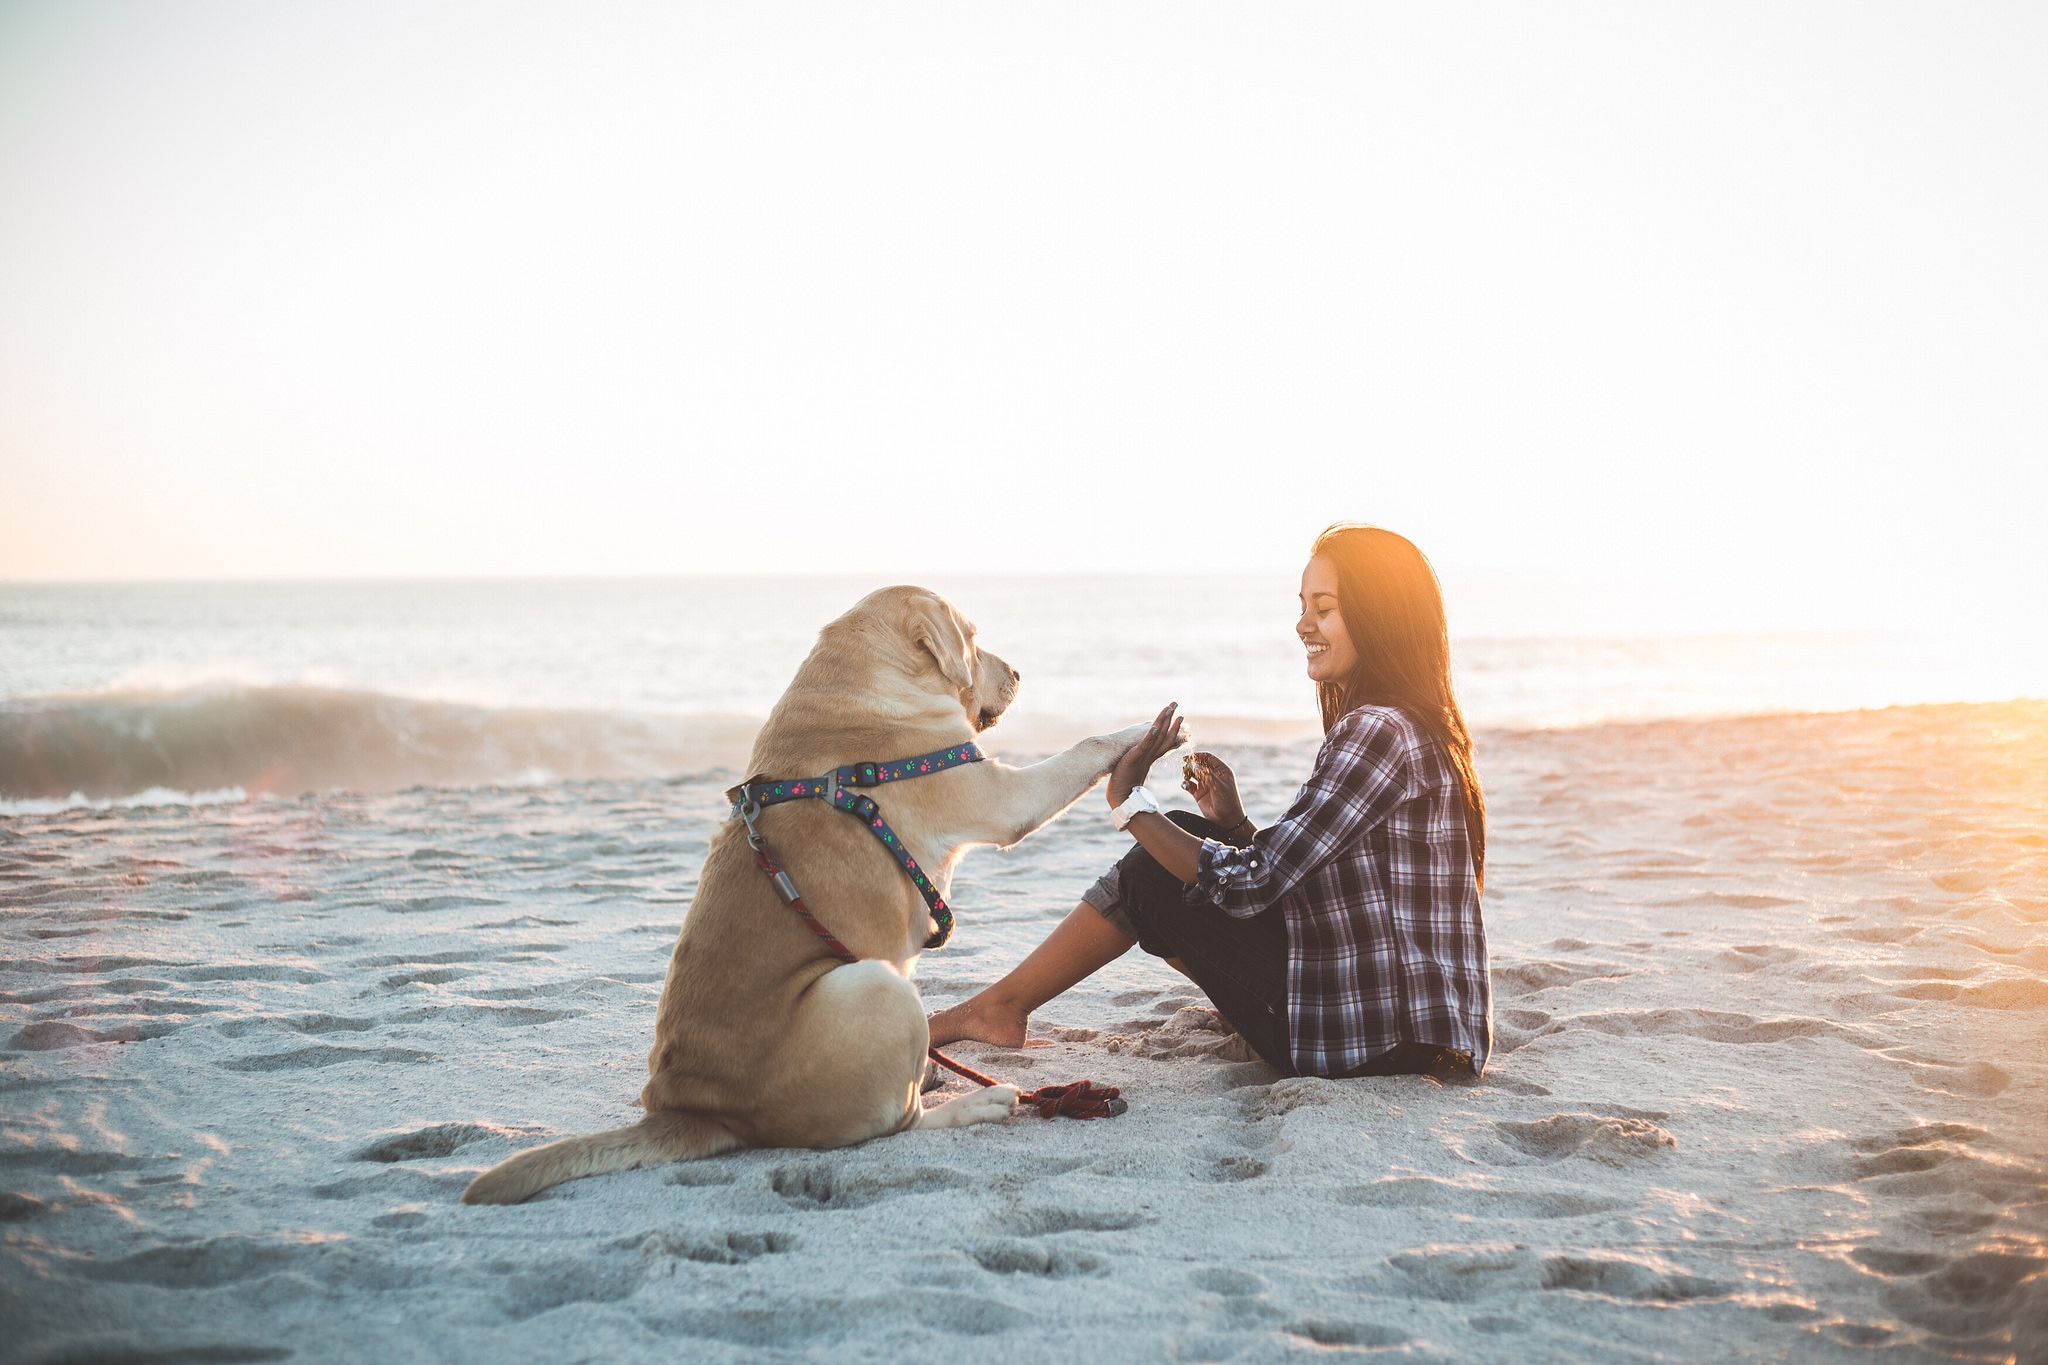

In [60]:
Image(filename=img_path)

## 向API发起请求

In [50]:
request_body = {
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": 2048,
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": PROMPT,
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": image_to_base64(img_path),
                    },
                },
            ],
        }
    ],
}
response = client.invoke_model(
    modelId=model_id,
    body=json.dumps(request_body),
)

## 解析API返回内容

In [51]:
result = json.loads(response.get("body").read())

In [52]:
result

{'id': 'msg_bdrk_01GxNeevnL9XcAJ9955P4md3',
 'type': 'message',
 'role': 'assistant',
 'model': 'claude-3-opus-20240229',
 'stop_sequence': None,
 'usage': {'input_tokens': 1601, 'output_tokens': 164},
 'content': [{'type': 'text',
   'text': '图片中出现了一只狗,看起来是一只拉布拉多犬。图中的女孩和狗狗坐在沙滩上,女孩伸手抚摸着狗狗,看起来两者的关系非常亲密友好。狗狗摆出了一个讨好的姿态,似乎很享受被抚摸的感觉。整个画面洋溢着温馨幸福的氛围,体现了人与狗之间互相陪伴、彼此信赖的美好关系。'}],
 'stop_reason': 'end_turn'}

In [57]:
vlm_result = result['content'][0]['text']

In [58]:
vlm_result

'图片中出现了一只狗,看起来是一只拉布拉多犬。图中的女孩和狗狗坐在沙滩上,女孩伸手抚摸着狗狗,看起来两者的关系非常亲密友好。狗狗摆出了一个讨好的姿态,似乎很享受被抚摸的感觉。整个画面洋溢着温馨幸福的氛围,体现了人与狗之间互相陪伴、彼此信赖的美好关系。'